Importing library

In [2]:
import pandas as pd
import numpy as np


Reading data from the files

In [4]:
data_amsterdam = pd.read_csv(("../data/rental_data_amsterdam_final.csv"),index_col=0)
data_utrecht = pd.read_csv(("../data/rental_data_utrecht_final.csv"),index_col=0)
data_rotterdam = pd.read_csv(("../data/rental_data_rotterdam_final.csv"),index_col=0)
postal_codes= pd.read_csv("../data/postalcodes_translation.csv",sep=";")


Deleting columns not required in analysis

In [5]:
del postal_codes['Housenumber']
postal_codes.head()

,Postalcode,Neighbourhood2019,Name_neighbourhood,District2019,Name_district,Municipality2019,Name_municipality
0,1011AB,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
1,1011AB,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
2,1011AB,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
3,1011AB,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
4,1011AB,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam


Deleting postcodes that are repeated multiple times

In [6]:
postal_codes=postal_codes.drop_duplicates()

In [7]:
postal_codes.head()

,Postalcode,Neighbourhood2019,Name_neighbourhood,District2019,Name_district,Municipality2019,Name_municipality
0,1011AB,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
8,1011AC,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
24,1011AD,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
26,1011AE,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
30,1011AG,3630403,Lastage,36304,Nieuwmarkt/Lastage,363,Amsterdam


Steps to merge two dataframe

In [8]:
data_amsterdam= data_amsterdam.rename(columns={'postcode_amsterdam': 'Postalcode'})
data_amsterdam.head()

,house_price_amsterdam,rental_agency_amsterdam,Postalcode,bedrooms_amsterdam,surface_amsterdam
0,2750.0,Out Amsterdam,1078JP,4,129
1,1350.0,Hevesta Bemiddeling,1055MR,1,37
2,2000.0,ViaDaan,1082TC,3,75
3,1700.0,Expats. Amsterdam Rentals,1072NN,3,55
4,1400.0,Hoofdstad Makelaars,1106CW,3,75


In [9]:
join_data_amsterdam=data_amsterdam.merge(postal_codes,how='left', left_on='Postalcode', right_on='Postalcode')
join_data_amsterdam.head()

,house_price_amsterdam,rental_agency_amsterdam,Postalcode,bedrooms_amsterdam,surface_amsterdam,Neighbourhood2019,Name_neighbourhood,District2019,Name_district,Municipality2019,Name_municipality
0,2750.0,Out Amsterdam,1078JP,4,129,3635201,Scheldebuurt West,36352,Scheldebuurt,363,Amsterdam
1,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633703,Landlust Zuid,36337,Landlust,363,Amsterdam
2,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633706,Landlust Noord,36337,Landlust,363,Amsterdam
3,2000.0,ViaDaan,1082TC,3,75,3639000,Gelderlandpleinbuurt,36390,Buitenveldert-West,363,Amsterdam
4,1700.0,Expats. Amsterdam Rentals,1072NN,3,55,3632403,Hercules Seghersbuurt,36324,Oude Pijp,363,Amsterdam


Checking for missing values

In [1]:
join_data_amsterdam.count()
missing_value = []

for col in join_data_amsterdam:
    missing_value.append(join_data_amsterdam[col].isnull().sum())
    print(col,"column has", missing_value[-1] , "missing value(s).\n")

NameError: name 'join_data_amsterdam' is not defined

In [11]:

#join_data_amsterdam[join_data_amsterdam.isnull().any(1)]

Dropping cells with missing values

In [12]:
updated_data_amsterdam = join_data_amsterdam.dropna()

In [13]:
updated_data_amsterdam.head()

,house_price_amsterdam,rental_agency_amsterdam,Postalcode,bedrooms_amsterdam,surface_amsterdam,Neighbourhood2019,Name_neighbourhood,District2019,Name_district,Municipality2019,Name_municipality
0,2750.0,Out Amsterdam,1078JP,4,129,3635201,Scheldebuurt West,36352,Scheldebuurt,363,Amsterdam
1,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633703,Landlust Zuid,36337,Landlust,363,Amsterdam
2,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633706,Landlust Noord,36337,Landlust,363,Amsterdam
3,2000.0,ViaDaan,1082TC,3,75,3639000,Gelderlandpleinbuurt,36390,Buitenveldert-West,363,Amsterdam
4,1700.0,Expats. Amsterdam Rentals,1072NN,3,55,3632403,Hercules Seghersbuurt,36324,Oude Pijp,363,Amsterdam


In [35]:
updated_data_amsterdam.describe()

,Rental_Prices,Bedrooms,Surface Area,Neighbourhood 2019,District 2019,Municipality 2019
count,2912.000000,2912.000000,2912.000000,2.912000e+03,2912.000000,2912.0
mean,1981.598558,2.743475,81.085165,3.633589e+06,36335.858860,363.0
std,918.612602,1.025504,40.390234,2.871075e+03,28.713471,0.0
min,350.000000,1.000000,12.000000,3.630000e+06,36300.000000,363.0
25%,1500.000000,2.000000,54.000000,3.630704e+06,36307.000000,363.0
50%,1750.000000,3.000000,75.000000,3.633505e+06,36335.000000,363.0
75%,2150.000000,3.000000,100.000000,3.635201e+06,36352.000000,363.0
max,12000.000000,7.000000,350.000000,3.639703e+06,36397.000000,363.0


Renaming Columns for better understanding

In [15]:
updated_data_amsterdam.columns
updated_data_amsterdam=updated_data_amsterdam.rename(columns={'house_price_amsterdam':'Rental_Prices', 'rental_agency_amsterdam':'Rental Agency', 'Postalcode':'Postcode',
       'bedrooms_amsterdam':'Bedrooms', 'surface_amsterdam':'Surface Area', 'Neighbourhood2019':'Neighbourhood 2019',
       'Name_neighbourhood':'Neighbourhood', 'District2019':'District 2019', 'Name_district': 'District Name',
       'Municipality2019':'Municipality 2019', 'Name_municipality':'Municipality Name'})
updated_data_amsterdam.head()

,Rental_Prices,Rental Agency,Postcode,Bedrooms,Surface Area,Neighbourhood 2019,Neighbourhood,District 2019,District Name,Municipality 2019,Municipality Name
0,2750.0,Out Amsterdam,1078JP,4,129,3635201,Scheldebuurt West,36352,Scheldebuurt,363,Amsterdam
1,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633703,Landlust Zuid,36337,Landlust,363,Amsterdam
2,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633706,Landlust Noord,36337,Landlust,363,Amsterdam
3,2000.0,ViaDaan,1082TC,3,75,3639000,Gelderlandpleinbuurt,36390,Buitenveldert-West,363,Amsterdam
4,1700.0,Expats. Amsterdam Rentals,1072NN,3,55,3632403,Hercules Seghersbuurt,36324,Oude Pijp,363,Amsterdam


Getting Statistics for rental Prices

In [16]:
updated_data_amsterdam['Rental_Prices'].describe()


count     2912.000000
mean      1981.598558
std        918.612602
min        350.000000
25%       1500.000000
50%       1750.000000
75%       2150.000000
max      12000.000000
Name: Rental_Prices, dtype: float64

count     2912.000000
mean      1981.598558
std        918.612602
min        350.000000
25%       1500.000000
50%       1750.000000
75%       2150.000000
max      12000.000000
Name: house_price_amsterdam, dtype: float64

Getting statistics on the basis of bedrooms

In [17]:
updated_data_amsterdam['Bedrooms'].value_counts().sort_index()

1     286
2     884
3    1224
4     380
5      99
6      25
7      14
Name: Bedrooms, dtype: int64

In [18]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

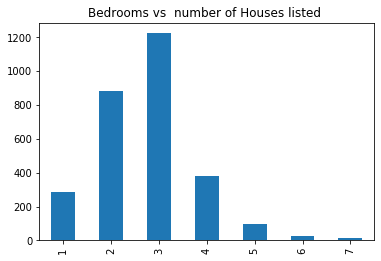

In [19]:
plt.title('Bedrooms vs  number of Houses listed ')
updated_data_amsterdam['Bedrooms'].value_counts().sort_index().plot.bar()

Showing the correlation between surface area and rental prices

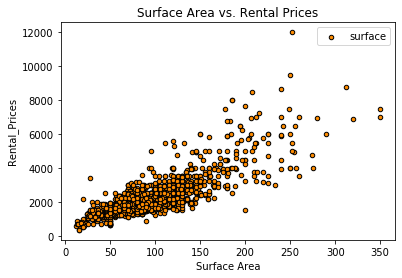

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(updated_data_amsterdam['Surface Area'],updated_data_amsterdam['Rental_Prices'], s=20, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("Surface Area")
plt.ylabel("Rental_Prices")
plt.title("Surface Area vs. Rental Prices")
plt.legend()
plt.show()

When it comes to the surface area of the apartment, there is a very clear upwards sloping trend relationship between the two!

Getting postcodes where most rental houses are listed ie most popular locality

In [21]:
updated_data_amsterdam['Postcode_Numeric'] = updated_data_amsterdam['Postcode'].str.replace('([A-Z]+)', '')

In [22]:
updated_data_amsterdam.head()

,Rental_Prices,Rental Agency,Postcode,Bedrooms,Surface Area,Neighbourhood 2019,Neighbourhood,District 2019,District Name,Municipality 2019,Municipality Name,Postcode_Numeric
0,2750.0,Out Amsterdam,1078JP,4,129,3635201,Scheldebuurt West,36352,Scheldebuurt,363,Amsterdam,1078
1,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633703,Landlust Zuid,36337,Landlust,363,Amsterdam,1055
2,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633706,Landlust Noord,36337,Landlust,363,Amsterdam,1055
3,2000.0,ViaDaan,1082TC,3,75,3639000,Gelderlandpleinbuurt,36390,Buitenveldert-West,363,Amsterdam,1082
4,1700.0,Expats. Amsterdam Rentals,1072NN,3,55,3632403,Hercules Seghersbuurt,36324,Oude Pijp,363,Amsterdam,1072


In [23]:
updated_data_amsterdam['Postcode_Numeric'].value_counts()

1055    266
1017    190
1015    145
1012    144
1016    144
       ... 
1086      3
1097      2
1042      2
1101      1
1105      1
Name: Postcode_Numeric, Length: 69, dtype: int64

In [26]:

most_recurring_locality=updated_data_amsterdam.query('Postcode_Numeric == "1055"')
most_recurring_locality.head()


,Rental_Prices,Rental Agency,Postcode,Bedrooms,Surface Area,Neighbourhood 2019,Neighbourhood,District 2019,District Name,Municipality 2019,Municipality Name,Postcode_Numeric
1,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633703,Landlust Zuid,36337,Landlust,363,Amsterdam,1055
2,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633706,Landlust Noord,36337,Landlust,363,Amsterdam,1055
35,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633703,Landlust Zuid,36337,Landlust,363,Amsterdam,1055
36,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633706,Landlust Noord,36337,Landlust,363,Amsterdam,1055
69,1350.0,Hevesta Bemiddeling,1055MR,1,37,3633703,Landlust Zuid,36337,Landlust,363,Amsterdam,1055


In [32]:
most_recurring_locality['Rental_Prices'].describe()

count     266.000000
mean     1348.289474
std       174.631652
min      1150.000000
25%      1250.000000
50%      1350.000000
75%      1350.000000
max      2250.000000
Name: Rental_Prices, dtype: float64

In [34]:
most_recurring_locality['Rental_Prices'].value_counts()

1250.0    123
1350.0    105
1850.0      4
1550.0      4
1500.0      4
1700.0      3
2250.0      3
2000.0      2
1600.0      2
1450.0      2
1375.0      2
1400.0      2
1800.0      1
1200.0      1
2200.0      1
1525.0      1
1150.0      1
1900.0      1
1925.0      1
1175.0      1
1495.0      1
1675.0      1
Name: Rental_Prices, dtype: int64

Most popular locality

In [24]:
most_recurring_locality['District Name'].value_counts()

Landlust       251
De Kolenkit      8
Erasmuspark      7
Name: District Name, dtype: int64

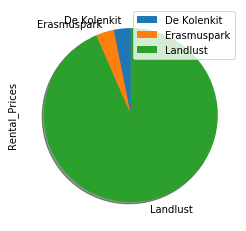

In [25]:
most_recurring_locality.groupby(['District Name']).sum().plot(kind='pie', y='Rental_Prices', shadow = True, startangle=90)


FINAL ANALYSIS

How common factors are affecting the price of the houses ?

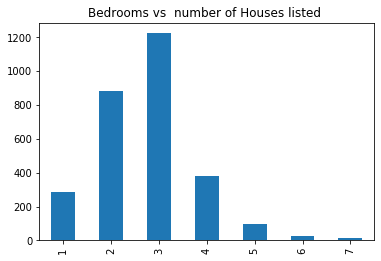

In [39]:
plt.title('Bedrooms vs  number of Houses listed ')
updated_data_amsterdam['Bedrooms'].value_counts().sort_index().plot.bar()

As seen from the above analysis , most listed houses are with 3 bedrooms ,followed by two.As we can see from the visualization 3 bedroom houses are most commonly sold followed by 2 bedroom. So how is it useful ? For a builder having this data , He can make a new building with more 3 and 4 bedroom’s to attract more buyers.


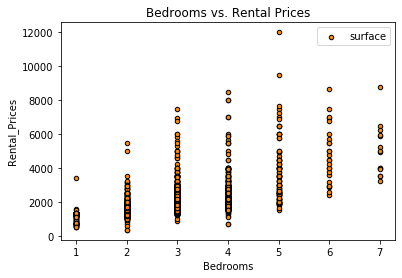

In [42]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(updated_data_amsterdam['Bedrooms'],updated_data_amsterdam['Rental_Prices'], s=20, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("Bedrooms")
plt.ylabel("Rental_Prices")
plt.title("Bedrooms vs. Rental Prices")
plt.legend()
plt.show()

From the  figure we can see that more the number of bedrooms . Thanks to scatter plot we can also see some irregularities that the house with the maximum number of bedrooms was sold for  less . This could be explained with may be less demand for them.

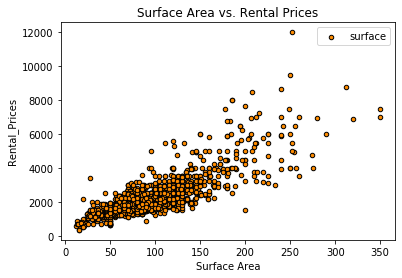

In [40]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(updated_data_amsterdam['Surface Area'],updated_data_amsterdam['Rental_Prices'], s=20, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("Surface Area")
plt.ylabel("Rental_Prices")
plt.title("Surface Area vs. Rental Prices")
plt.legend()
plt.show()

Maximum square feet is 12  where as the minimum is 350. we can see that the data is distributed

Also,When it comes to the surface area of the apartment, there is a very clear upwards sloping trend relationship between the two

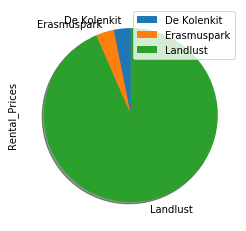

In [41]:
most_recurring_locality.groupby(['District Name']).sum().plot(kind='pie', y='Rental_Prices', shadow = True, startangle=90)


And most of the houses are listed in Landlust ,De Kolenkit  ,Erasmuspark    areas of Amsterdam  with prices between 1150 Euros and 2250 Euros and majority of them at 1250 Euros. 